In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew
from statistics import mode

from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
import pandas as pd 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
print ("1 \n")

In [12]:
print ("Train data shape:", train.shape)
print ("Test data shape:", test.shape)

Train data shape: (1460, 81)
Test data shape: (1459, 80)


In [5]:
print (train.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008     

In [10]:
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


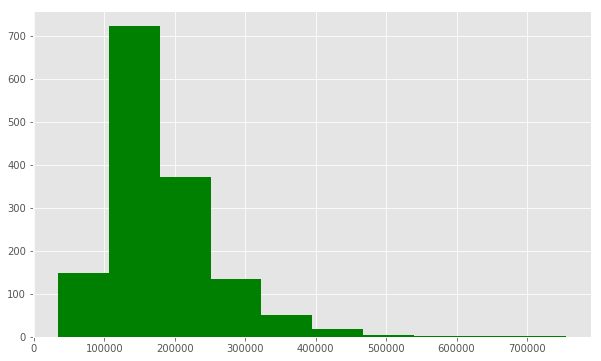

In [22]:
print (train.SalePrice.describe())
plt.hist(train.SalePrice, color = 'green')
plt.show()



 The Skey is the following :  0.12174203145727748


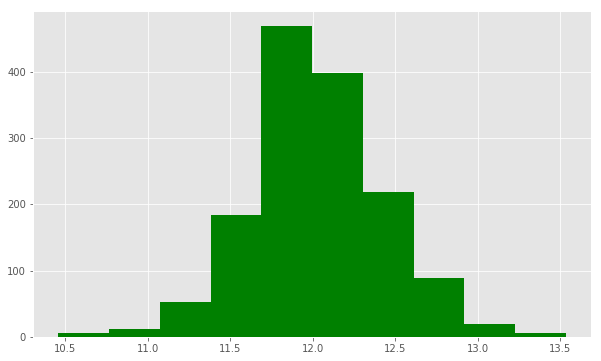

In [31]:
target = np.log(train.SalePrice)
print ("\n The Skey is the following : ", target.skew())
plt.hist(target, color='green')
plt.show()

In [32]:
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()

print (corr['SalePrice'].sort_values(ascending=False) [:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False) [:-5])


SalePrice      1.000000
OverallQual    0.792879
GrLivArea      0.725145
TotalBsmtSF    0.644318
GarageCars     0.644097
Name: SalePrice, dtype: float64 

SalePrice       1.000000
OverallQual     0.792879
GrLivArea       0.725145
TotalBsmtSF     0.644318
GarageCars      0.644097
GarageArea      0.638807
1stFlrSF        0.624230
FullBath        0.560438
TotRmsAbvGrd    0.536972
YearBuilt       0.521888
YearRemodAdd    0.505876
GarageYrBlt     0.486758
MasVnrArea      0.476749
Fireplaces      0.469402
BsmtFinSF1      0.405131
LotFrontage     0.369805
WoodDeckSF      0.325546
2ndFlrSF        0.322203
OpenPorchSF     0.318342
HalfBath        0.285519
LotArea         0.268806
BsmtFullBath    0.227370
BsmtUnfSF       0.214996
BedroomAbvGr    0.169781
ScreenPorch     0.112145
PoolArea        0.099888
MoSold          0.046543
3SsnPorch       0.044869
BsmtFinSF2     -0.011058
BsmtHalfBath   -0.016600
MiscVal        -0.020180
Id             -0.021149
LowQualFinSF   -0.025538
Name: SalePrice, dtyp

In [34]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'

print(nulls)

              Null Count
Feature                 
PoolQC              1449
MiscFeature         1402
Alley               1364
Fence               1174
FireplaceQu          689
LotFrontage          258
GarageCond            81
GarageType            81
GarageYrBlt           81
GarageFinish          81
GarageQual            81
BsmtExposure          38
BsmtFinType2          38
BsmtFinType1          37
BsmtCond              37
BsmtQual              37
MasVnrArea             8
MasVnrType             8
Electrical             1
Utilities              0
YearRemodAdd           0
MSSubClass             0
Foundation             0
ExterCond              0
ExterQual              0


In [35]:
categoricals = train.select_dtypes(exclude=[np.number])
print(categoricals.describe())

       MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1455   1455    91     1455        1455      1455      1455   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1147   1450    50      921        1309      1454      1048   

       LandSlope Neighborhood Condition1      ...      GarageType  \
count       1455         1455       1455      ...            1374   
unique         3           25          9      ...               6   
top          Gtl        NAmes       Norm      ...          Attchd   
freq        1378          225       1257      ...             867   

       GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence  \
count          1374       1374       1374       1455      6    281   
unique            3          5          5          3      3      4   
top             Unf         TA         TA          Y     Ex  MnPrv   
freq    

In [36]:
print("\n")

In [43]:
print ("Original: \n")
print (train.Street.value_counts(), "/n")

train["enc_street"] = pd.get_dummies(train.Street, drop_first=True)
test["enc_street"] = pd.get_dummies(train.Street, drop_first=True)

print("\n")

print ("Encoded: \n")
print (train.enc_street.value_counts())

Original: 

Pave    1450
Grvl       5
Name: Street, dtype: int64 /n


Encoded: 

1    1450
0       5
Name: enc_street, dtype: int64


In [44]:
print("\n")

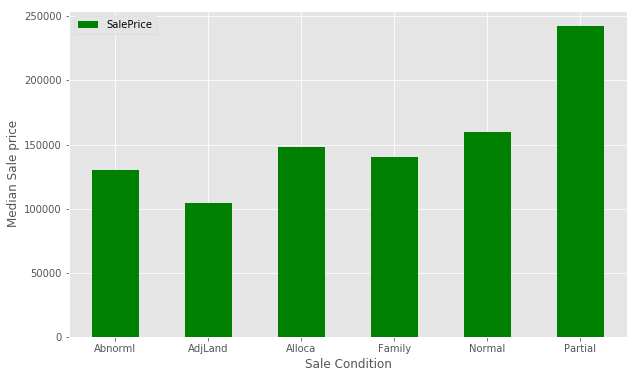

In [49]:
condition_pivot = train.pivot_table ( index='SaleCondition', values='SalePrice', aggfunc = np.median)
condition_pivot.plot(kind='bar', color='green')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale price')
plt.xticks(rotation=0)
plt.show()

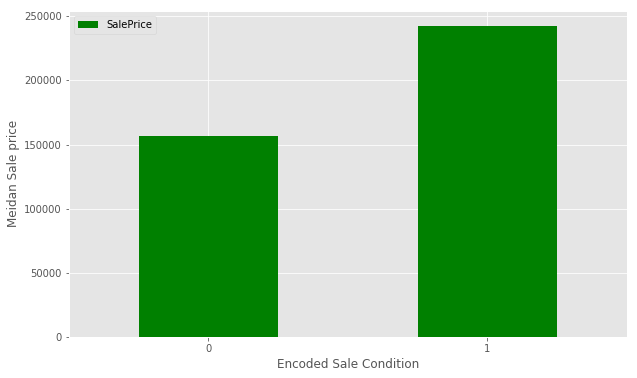

In [55]:
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

condition_pivot = train.pivot_table ( index='enc_condition', values='SalePrice', aggfunc = np.median)
condition_pivot.plot(kind='bar', color='green')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Meidan Sale price')
plt.xticks(rotation=0)
plt.show()

In [56]:
print ("\n")

In [63]:
data= train.select_dtypes(include=[np.number]).interpolate().dropna()

print(sum(data.isnull().sum()!=0))
Y=np.log(train.SalePrice)
X= data.drop(['SalePrice', 'Id'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=.33)

lr=linear_model.LinearRegression()

model = lr.fit(X_train, Y_train)



0


In [64]:
print("R^2 is the following: \n", model.score(X_test, Y_test))
print("\n")

R^2 is the following: 
 0.8882477709262508




RMSE is the following: 
 0.017841794519568282


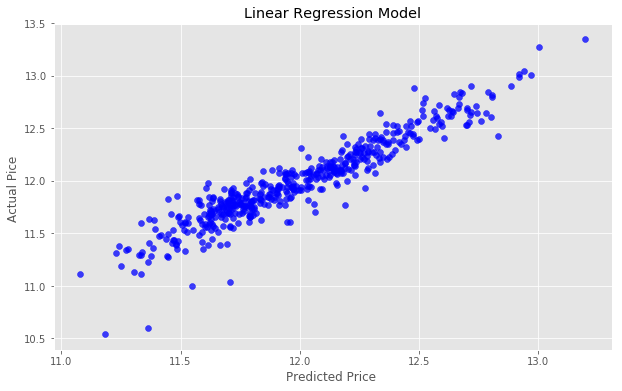

In [73]:
predictions = model.predict(X_test)

print('RMSE is the following: \n', mean_squared_error(Y_test, predictions))
actual_values = Y_test
plt.scatter(predictions, actual_values, alpha=.75, color="b")
plt.xlabel('Predicted Price ')
plt.ylabel('Actual Pice ')
plt.title('Linear Regression Model')
plt.show()


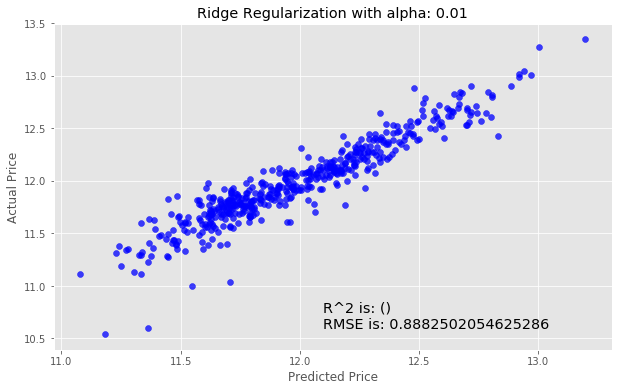

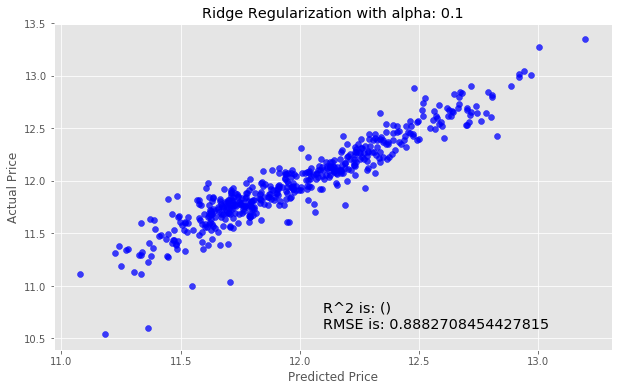

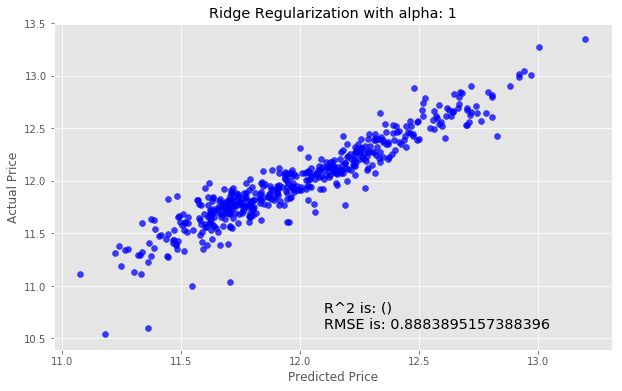

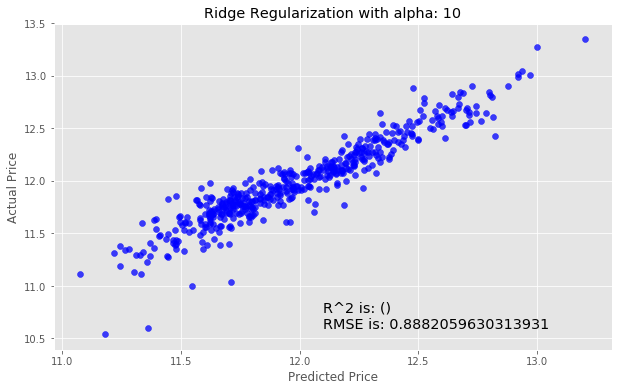

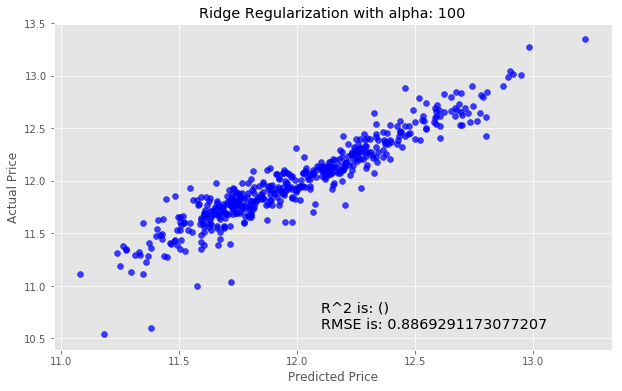

In [82]:
for i in range (-2, 3):
    alpha = 10**i
    rm= linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, Y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha: {}'. format(alpha))
    overlay = "R^2 is: ()\nRMSE is: {}".format(ridge_model.score(X_test, Y_test),mean_squared_error(Y_test, preds_ridge))
    plt.annotate(s=overlay, xy=(12.1,10.6), size='x-large')
    plt.show()

In [83]:
submission = pd.DataFrame()
submission['Id'] = test.Id

feats = test.select_dtypes(
    include=[np.number]).drop(['Id'], axis = 1).interpolate()
predictions = model.predict(feats)
final_predictions = np.exp(predictions)

print("Original predictions are the following: \n", predictions[:10], "\n")
print("Final predictions are the following: \n", final_predictions[:10])
print("\n")
print("\n")
submission["SalePrice"] = final_predictions


submission.to_csv('Assignment3_Predictions.csv', index=False)


Original predictions are the following: 
 [11.76725362 11.71929504 12.07656074 12.20632678 12.11217655 12.05709882
 12.16036698 12.01665734 12.17126892 11.66318882] 

Final predictions are the following: 
 [128959.49172586 122920.74024357 175704.82598101 200050.83263755
 182075.46986405 172318.33397533 191064.621642   165488.55901671
 193158.99133191 116214.02546462]




